# Proyek Analisis Data dengan Python : E-Commerce Public Dataset
- Nama: Komang Ryandhi Suandita
- Email: kryandhi@gmail.com
- Id Dicoding:kryandhi

## Menentukan Pertanyaan Bisnis

1. Berapa jumlah pesanan yang disetujui setiap bulan dalam rentang waktu tertentu, dan bagaimana perubahannya dari bulan ke bulan?
2. Produk apa yang memiliki penjualan tertinggi nomor 1 dan terendah nomor 1?
3. Bagaimana tingkat kepuasan pelanggan pada tahun 2018 berdasarkan data survei dan metrik terkait?
4. Dimana letak geografis yang memiliki customer terbanyak?

Proyek ini bertujuan untuk menganalisis data pada E-Commerce Public Dataset. Tujuan akhirnya adalah untuk menghasilkan wawasan dan informasi yang berguna dari data yang dianalisis.

In [1]:
%pip install seaborn
%pip install gdown

## Import library yang dibutuhkan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib
import zipfile
import matplotlib.image as mpimg
import requests
import io
import gdown
import zipfile
import os
import datetime as dt

## Data Wrangling

### Gathering Data

In [3]:
# File ID dari Google Drive link
file_id = '1MsAjPM7oKtVfJL_wRp1qmCajtSG1mdcK'

# URL untuk mengunduh file
url = f'https://drive.google.com/uc?id={file_id}'

# Destination file path
downloaded_file = 'E-commerce-public-dataset.zip'
output_folder = 'data/'

# Download the file
gdown.download(url, downloaded_file, quiet=False)

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Unzip the file
with zipfile.ZipFile(downloaded_file, 'r') as zip_ref:
    zip_ref.extractall(output_folder)

# Clean up: Remove the downloaded zip file
os.remove(downloaded_file)

print("Download and extraction completed.")


Downloading...
From (original): https://drive.google.com/uc?id=1MsAjPM7oKtVfJL_wRp1qmCajtSG1mdcK
From (redirected): https://drive.google.com/uc?id=1MsAjPM7oKtVfJL_wRp1qmCajtSG1mdcK&confirm=t&uuid=4028da24-13af-4490-9bab-fb610b0eff1c
To: /content/E-commerce-public-dataset.zip
100%|██████████| 44.9M/44.9M [00:01<00:00, 37.5MB/s]


Download and extraction completed.


In [4]:
customers_df = pd.read_csv('./data/E-Commerce Public Dataset/customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
geolocation_df = pd.read_csv('./data/E-Commerce Public Dataset/geolocation_dataset.csv')
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [6]:
order_items_df = pd.read_csv('./data/E-Commerce Public Dataset/order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [7]:
order_payment_df = pd.read_csv('./data/E-Commerce Public Dataset/order_payments_dataset.csv')
order_payment_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [8]:
order_reviews_df = pd.read_csv('./data/E-Commerce Public Dataset/order_reviews_dataset.csv')
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [9]:
orders_df = pd.read_csv('./data/E-Commerce Public Dataset/orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [10]:
product_category_df = pd.read_csv('./data/E-Commerce Public Dataset/product_category_name_translation.csv')
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [11]:
products_df = pd.read_csv('./data/E-Commerce Public Dataset/products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [12]:
sellers_df = pd.read_csv('./data/E-Commerce Public Dataset/sellers_dataset.csv')
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

Menilai Data

#### Info df customers

In [13]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [14]:
customers_df.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [15]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [16]:
customers_df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
99436,False
99437,False
99438,False
99439,False


#### Info df geolocation

In [17]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [18]:
geolocation_df.isna().sum()

,0
geolocation_zip_code_prefix,0
geolocation_lat,0
geolocation_lng,0
geolocation_city,0
geolocation_state,0


In [19]:
geolocation_df.describe(include="all")

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,1.000163e+06,1.000163e+06,1.000163e+06,1000163,1000163
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,135800,404268
mean,3.657417e+04,-2.117615e+01,-4.639054e+01,NaN,NaN
std,3.054934e+04,5.715866e+00,4.269748e+00,NaN,NaN
min,1.001000e+03,-3.660537e+01,-1.014668e+02,NaN,NaN
25%,1.107500e+04,-2.360355e+01,-4.857317e+01,NaN,NaN
50%,2.653000e+04,-2.291938e+01,-4.663788e+01,NaN,NaN
75%,6.350400e+04,-1.997962e+01,-4.376771e+01,NaN,NaN


In [20]:
print("Jumlah data geolocation duplikat", geolocation_df.duplicated().sum())

Jumlah data geolocation duplikat 261831


In [21]:
geolocation_df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
1000158,False
1000159,True
1000160,True
1000161,False


##### Terdapat 261831 data duplikat pada tabel geolocation

#### Info df order_items

In [22]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [23]:
order_items_df.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [24]:
order_items_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


In [25]:
order_items_df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
112645,False
112646,False
112647,False
112648,False


##### kolom shipping_limit_date bukan termasuk tipe data object

#### Info df order_payment

In [26]:
order_payment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [27]:
order_payment_df.isna().sum()

,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


In [28]:
order_payment_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [29]:
order_payment_df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
103881,False
103882,False
103883,False
103884,False


#### Info df order_reviews

In [30]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [31]:
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [32]:
order_reviews_df.describe(include="all")

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,11568,40977,99224,99224
unique,98410,98673,NaN,4527,36159,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,423,230,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


In [33]:
order_reviews_df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
99219,False
99220,False
99221,False
99222,False


##### Tabel reviews memiliki 2 kolom dengan missing value, yaitu:
- review_comment_title
- review_comment_message

Tipe data pada kolom dengan data date belum sesuai, masih berupa object

#### Info df orders

##### Tabel orders memiliki missing value pada kolom
- order_approved_at
- order_delivered_carrier_date
- order_delivered_customer_date

Tipe data pada kolom dengan data date belum sesuai, masih berupa object

#### Info df product_category

In [34]:
product_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [35]:
product_category_df.isna().sum()

,0
product_category_name,0
product_category_name_english,0


In [36]:
product_category_df.describe(include="all")

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [37]:
product_category_df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
66,False
67,False
68,False
69,False


#### Info df products

In [38]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [39]:
products_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [40]:
products_df.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


In [41]:
products_df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
32946,False
32947,False
32948,False
32949,False


Tabel products memiliki missing values pada kolom semua kolom kecuali product_id



#### Info df sellers

In [42]:
sellers_df.info

<bound method DataFrame.info of                              seller_id  seller_zip_code_prefix  \
0     3442f8959a84dea7ee197c632cb2df15                   13023   
1     d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2     ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3     c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4     51a04a8a6bdcb23deccc82b0b80742cf                   12914   
...                                ...                     ...   
3090  98dddbc4601dd4443ca174359b237166                   87111   
3091  f8201cab383e484733266d1906e2fdfa                   88137   
3092  74871d19219c7d518d0090283e03c137                    4650   
3093  e603cf3fec55f8697c9059638d6c8eb5                   96080   
3094  9e25199f6ef7e7c347120ff175652c3b                   12051   

            seller_city seller_state  
0              campinas           SP  
1            mogi guacu           SP  
2        rio de janeiro           RJ  
3             sao paulo           SP  
4     braganca paulista           SP  
...                 ...          ...  
3090            sarandi           PR  
3091            palhoca           SC  
3092          sao paulo           SP  
3093            pelotas           RS  
3094            taubate           SP  

[3095 rows x 4 columns]>

In [43]:
sellers_df.describe(include="all")

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


In [44]:
sellers_df.isna().sum()

,0
seller_id,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


In [45]:
sellers_df.describe(include="all")

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


In [46]:
sellers_df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
3090,False
3091,False
3092,False
3093,False


### Cleaning Data

Drop duplikat

#### Cleaning data tabel geolocation

In [47]:
# Drop data duplikat
geolocation_df.drop_duplicates(inplace=True)

In [48]:
geolocation_df.duplicated().sum()

0

#### Cleaning data tabel order_items

In [49]:
order_item_col=['shipping_limit_date']
for col in order_item_col:
    order_items_df[col]=pd.to_datetime(order_items_df[col])

In [50]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


#### Cleaning data tabel order_reviews

Terdapat missing value pada 2 kolom, yaitu: review_comment_title dan review_comment_message. Drop kolom akan dilakukan karena isi dari 2 kolom tersebut yang berupa text tidak akan digunakan dalam analisis data.

In [51]:
drop_cols = ['review_comment_title', 'review_comment_message']
order_reviews_df.drop(drop_cols, axis= 1, inplace= True)

In [52]:
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_creation_date,0
review_answer_timestamp,0


In [53]:
order_review_col=['review_creation_date','review_answer_timestamp']
for col in order_review_col:
    order_reviews_df[col]=pd.to_datetime(order_reviews_df[col])

In [54]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_creation_date     99224 non-null  datetime64[ns]
 4   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 3.8+ MB


#### Cleaning data tabel orders

In [55]:
orders_col=[
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]
for col in orders_col:
    orders_df[col]=pd.to_datetime(orders_df[col])

In [56]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


#### Cleaning data tabel products

Melakukan drop kolom-kolom yang tidak dipakai di analisis data

In [57]:
product_drop_cols = ['product_name_lenght',
                     'product_description_lenght',
                     'product_weight_g',
                     'product_length_cm',
                     'product_height_cm',
                     'product_width_cm']

products_df.drop(product_drop_cols, axis= 1, inplace= True)

Melakukan penggantian missing value pada kolom product_category_name dengan modus dan product_photos_qty dengan median

In [58]:
products_df['product_category_name'].fillna(products_df['product_category_name'].mode()[0], inplace=True)
products_df['product_photos_qty'].fillna(products_df['product_photos_qty'].median(), inplace=True)

<ipython-input-58-20ade7a0f939>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df['product_category_name'].fillna(products_df['product_category_name'].mode()[0], inplace=True)
<ipython-input-58-20ade7a0f939>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

In [59]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             32951 non-null  object 
 1   product_category_name  32951 non-null  object 
 2   product_photos_qty     32951 non-null  float64
dtypes: float64(1), object(2)
memory usage: 772.4+ KB


## Exploratory Data Analysis (EDA)

Proses Analisis Data dari masing masing tabel untuk mendapatkan insight.

### Explore tabel customers

In [60]:
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
58631,a44b5afa2f79b679e5553363b1b0d8e9,38e345cf51b18ca09e48d38c466c9aac,27933,macae,RJ
55114,e545e697bb9d1b81e0a702121d4e94d5,cdbbafa842e30d5e79dcef5bdc118831,7175,guarulhos,SP
15614,1bde0d4e3110504dff1154416342f246,f6d3570a6defa3ebd67df54f01a9b176,12400,pindamonhangaba,SP
73722,1929fe44659545005a8b8311ef2dfd1d,82c887949254710fd671db2d84d7a220,13473,americana,SP
90447,ba6fd01891caf33ec537f8c4fa78a866,b6f596427b4ad91452aaa3be77b5b025,7012,guarulhos,SP


In [61]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [62]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
ibiara,1
rio espera,1
rio dos indios,1


In [63]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


Diketahui bahwa customer terbanyak berasal dari Sao Paulo City dan Sao Paulo State

### Explore tabel orders

In [64]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
46857,f2fef86d37e16a1ecdf91073beba7f7b,ef486f9c35f2768e544a03fee7eea271,delivered,2018-02-09 19:00:57,2018-02-15 03:47:53,2018-02-20 00:12:54,2018-03-10 17:31:50,2018-03-12
27645,18b9fb35499462319a6ca38275f72810,f60f92f99f0e3a36785244a2dd2836d9,delivered,2018-02-05 12:56:57,2018-02-05 13:15:29,2018-02-06 22:32:05,2018-02-10 15:06:02,2018-03-01
54940,8d4bf0250a288cb514e50be83d8d6cd1,5b165ab5c9dc4074ae3700e3be9ea23f,delivered,2017-11-06 11:03:14,2017-11-07 07:30:38,2017-11-09 17:32:26,2017-11-27 18:42:40,2017-11-24
20964,77bf14a61d9efbddff1e34f655e5ded6,ea0bf08a86058c39996ba369b82e743c,delivered,2018-03-11 19:39:41,2018-03-13 03:50:36,2018-03-14 20:38:44,2018-04-25 17:56:33,2018-04-03
84451,54d6f9d8f56229d3da815add65ec2408,ab156e9202420e577b405360a7b29cbc,delivered,2018-03-22 10:58:13,2018-03-22 11:15:35,2018-04-05 20:07:42,2018-05-21 17:52:28,2018-04-30


In [65]:
delivery_time = orders_df["order_delivered_customer_date"] - orders_df["order_delivered_carrier_date"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders_df["delivery_time"] = round(delivery_time/86400)

In [66]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
48295,a2e1586a9d74f3d08df52b4eea515b6c,0a44d5a0e291790b28962484733083ad,delivered,2018-07-28 21:03:38,2018-07-28 21:40:06,2018-07-30 15:05:00,2018-08-02 19:11:42,2018-09-05,3.0
83314,ffd84ab39cd5e873d8dba24342e65c01,36f88c6d688a9e53e993ec01c66c6d25,delivered,2017-10-04 19:43:14,2017-10-05 19:49:17,2017-10-06 20:29:10,2017-10-09 16:19:25,2017-10-23,3.0
60103,3c86b0f3acff06bcd6f7c6577ba4bcd3,efdd9e894ef573b7168acb6b0d8a5d1c,delivered,2017-09-28 16:14:09,2017-09-28 16:25:22,2017-10-05 20:34:59,2017-10-10 21:04:31,2017-11-06,5.0
19519,ad01e26d29b4818ba6299d1356a130b7,c2a6b573f9d894a18a37d09b680910b3,delivered,2018-08-12 21:06:51,2018-08-14 05:44:07,2018-08-15 14:09:00,2018-08-22 16:09:42,2018-09-06,7.0
25096,e72a5280a46ca876b0fd05c1a1ee605c,e27a8cc9ed6af44e996a710cc9c09565,delivered,2017-09-13 19:56:29,2017-09-13 20:10:21,2017-09-15 17:57:56,2017-09-21 16:23:33,2017-10-03,6.0


In [67]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
count,99441,99441,99441,99441,99281,97658,96476,99441,96475.000000
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 18:35:24.098800128,2018-01-04 21:49:48.138278656,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232,9.292314
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00,-16.000000
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-12 23:24:16,2017-09-15 22:28:50.249999872,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00,4.000000
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:36:13,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00,7.000000
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 20:35:10,2018-05-08 13:37:45,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00,12.000000
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00,205.000000


### Explore customers_df & orders_df

In [68]:
# Merge customers_df & orders_df
customer_orders_df = pd.merge(
    left=customers_df,
    right=orders_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
customer_orders_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,2.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,14.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,3.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,10.0


### Explore order_payment & order_reviews

In [69]:
# Merge order_payment & order_reviews
order_payment_review_df = pd.merge(
    left=order_payment_df,
    right=order_reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
order_payment_review_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,2018-05-10,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,2018-06-30,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,2017-12-19,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,2017-12-21,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,2017-12-21,2017-12-22 01:10:39


In [70]:
order_payment_review_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

,order_id
payment_type,
credit_card,76505
boleto,19784
voucher,3866
debit_card,1528
not_defined,3


In [71]:
order_payment_review_df.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_value":  ["min", "max"]
})

order_id payment_value          
              nunique           min       max
payment_type                                 
boleto          19784         11.62   7274.88
credit_card     76505          0.01  13664.08
debit_card       1528         13.38   4445.50
not_defined         3          0.00      0.00
voucher          3866          0.00   3184.34

In [72]:
order_payment_review_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_creation_date,review_answer_timestamp
count,104477,104477.000000,104477,104477.000000,104477.000000,103677,103677.000000,103677,103677
unique,99440,NaN,5,NaN,NaN,98409,NaN,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN,f28281373ab8815bafafe371218f02ce,NaN,NaN,NaN
freq,29,NaN,77198,NaN,NaN,29,NaN,NaN,NaN
mean,NaN,1.093379,NaN,2.856418,153.923071,NaN,4.083886,2018-01-11 09:45:35.808327680,2018-01-14 13:31:44.002912768
min,NaN,1.000000,NaN,0.000000,0.000000,NaN,1.000000,2016-10-02 00:00:00,2016-10-11 14:31:29
25%,NaN,1.000000,NaN,1.000000,56.780000,NaN,4.000000,2017-09-21 00:00:00,2017-09-23 22:17:51
50%,NaN,1.000000,NaN,1.000000,100.000000,NaN,5.000000,2018-01-31 00:00:00,2018-02-03 02:04:58
75%,NaN,1.000000,NaN,4.000000,171.690000,NaN,5.000000,2018-05-15 00:00:00,2018-05-17 13:13:46
max,NaN,29.000000,NaN,24.000000,13664.080000,NaN,5.000000,2018-08-31 00:00:00,2018-10-29 12:27:35


### Explore customers_orders & payments_reviews

In [73]:
# Merge customers_orders & payments_reviews
customer_df = pd.merge(
    left=customer_orders_df,
    right=order_payment_review_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
customer_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,order_estimated_delivery_date,delivery_time,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,2017-06-05,2.0,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,2017-05-26,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,2018-02-06,14.0,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,2018-01-30,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,2018-06-13,3.0,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,2018-06-15,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,2018-04-10,1.0,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,2018-03-29,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,2018-08-15,10.0,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,2018-08-10,2018-08-17 01:59:52


### Explore order_items & sellers

In [74]:
# Merge order_items & sellers
item_seller_df = pd.merge(
    left=order_items_df,
    right=sellers_df,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
item_seller_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


In [75]:
item_seller_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False).head(10)

,seller_id
seller_city,
sao paulo,694
curitiba,127
rio de janeiro,96
belo horizonte,68
ribeirao preto,52
guarulhos,50
ibitinga,49
santo andre,45
campinas,41


In [76]:
item_seller_df.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False).head(10)

,seller_id
seller_state,
SP,1849
PR,349
MG,244
SC,190
RJ,171
RS,129
GO,40
DF,30
ES,23


### Explore products & product_category

In [77]:
# Merge products & product_category
products_df = pd.merge(
    left=products_df,
    right=product_category_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
products_df.head()

,product_id,product_category_name,product_photos_qty,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,1.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,1.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,1.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,4.0,housewares


In [78]:
products_df.groupby(by="product_category_name_english").product_id.nunique().sort_values(ascending=False)

,product_id
product_category_name_english,
bed_bath_table,3639
sports_leisure,2867
furniture_decor,2657
health_beauty,2444
housewares,2335
...,...
tablets_printing_image,9
home_comfort_2,5
fashion_childrens_clothes,5


### Explore item_seller & products

In [79]:
sellers_df = pd.merge(
    left=products_df,
    right=item_seller_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
sellers_df.head()

,product_id,product_category_name,product_photos_qty,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,1.0,perfumery,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,3694,sao paulo,SP
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1.0,art,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,2955,sao paulo,SP
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,1.0,sports_leisure,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,2016,sao paulo,SP
3,cef67bcfe19066a932b7673e239eb23d,bebes,1.0,baby,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,13330,indaiatuba,SP
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,4.0,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,4461,sao paulo,SP


In [80]:
sellers_df.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "price":  ["min", "max"]
})

order_id  price         
                               nunique    min      max
product_category_name_english                         
agro_industry_and_commerce         182  12.99  2990.00
air_conditioning                   253  10.90  1599.00
art                                202   3.50  6499.00
arts_and_craftmanship               23   9.80   289.49
audio                              350  14.90   598.99
...                                ...    ...      ...
stationery                        2311   2.29  1693.00
tablets_printing_image              79  14.90   889.99
telephony                         4199   5.00  2428.00
toys                              3886   4.90  1699.99
watches_gifts                     5624   8.99  3999.90

[71 rows x 3 columns]

### Explore All Data

In [81]:
# Merge all data
# Data geolocation tidak digunakan karena tidak berkaitan dengan pertanyaan bisnis yang akan diselesaikan
all_data = pd.merge(
    left=customer_df,
    right=sellers_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_photos_qty,product_category_name_english,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,8577.0,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,3.0,housewares,1.0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,88303.0,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,1.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,8577.0,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,1.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,8577.0,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,1.0,home_confort,1.0,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,14940.0,ibitinga,SP


In [82]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    119143 non-null  object        
 1   customer_unique_id             119143 non-null  object        
 2   customer_zip_code_prefix       119143 non-null  int64         
 3   customer_city                  119143 non-null  object        
 4   customer_state                 119143 non-null  object        
 5   order_id                       119143 non-null  object        
 6   order_status                   119143 non-null  object        
 7   order_purchase_timestamp       119143 non-null  datetime64[ns]
 8   order_approved_at              118966 non-null  datetime64[ns]
 9   order_delivered_carrier_date   117057 non-null  datetime64[ns]
 10  order_delivered_customer_date  115722 non-null  datetime64[ns]
 11  

### Cleaning all_data

In [83]:
def analyze_table(df):
    # Print info table
    print(f"\n---Info Tabel---\n")
    df.info()

    # Print missing values table
    print(f"\n---Missing Value---\n")
    print(df.isna().sum())

    # Print duplicated values count
    print(f"\n---Duplikat---\n")
    print(df.duplicated().sum())

    # Print table description
    print(f"\n---Deskripsi Tabel---\n")
    print(df.describe())

In [84]:
analyze_table(all_data)


---Info Tabel---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    119143 non-null  object        
 1   customer_unique_id             119143 non-null  object        
 2   customer_zip_code_prefix       119143 non-null  int64         
 3   customer_city                  119143 non-null  object        
 4   customer_state                 119143 non-null  object        
 5   order_id                       119143 non-null  object        
 6   order_status                   119143 non-null  object        
 7   order_purchase_timestamp       119143 non-null  datetime64[ns]
 8   order_approved_at              118966 non-null  datetime64[ns]
 9   order_delivered_carrier_date   117057 non-null  datetime64[ns]
 10  order_delivered_customer_date  115722 non-null  d

In [85]:
# Mengisi nilai yang hilang dengan rata-rata pada kolom numerik
numeric_columns = ['delivery_time', 'payment_sequential', 'payment_installments', 'payment_value', 'review_score',
                    'product_photos_qty', 'price', 'freight_value']
for col in numeric_columns:
    mean_value = all_data[col].mean()
    all_data[col].fillna(mean_value, inplace=True)

<ipython-input-85-c2d04471af64>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  all_data[col].fillna(mean_value, inplace=True)


In [86]:
# Mengisi nilai yang hilang dengan modus pada kolom kategori
categorical_columns = ['payment_type', 'product_category_name', 'seller_city']
for col in categorical_columns:
    mode_value = all_data[col].mode()[0]
    all_data[col].fillna(mode_value, inplace=True)

<ipython-input-86-fa62b3ba9296>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  all_data[col].fillna(mode_value, inplace=True)


In [87]:
# Mengisi nilai yang hilang pada kolom tanggal dengan metode forward fill
date_columns = ['order_approved_at', 'order_delivered_carrier_date']
for col in date_columns:
    all_data[col].fillna(method='ffill', inplace=True)

<ipython-input-87-e3c2781d4cfe>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  all_data[col].fillna(method='ffill', inplace=True)
<ipython-input-87-e3c2781d4cfe>:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  all_data[col].fillna(method='ffill', inplace=True)


In [88]:
# Memastikan tidak ada nilai yang hilang yang tersisa
all_data.dropna(inplace=True)

In [89]:
all_data.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0
order_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0


### EDA all_data

In [90]:
all_data.groupby(by=["customer_city", "product_category_name_english"]).agg({
    "price": "sum",
    "freight_value": "sum"
})

price  freight_value
customer_city       product_category_name_english                       
abadia dos dourados books_general_interest          39.90          18.38
                    cool_stuff                     199.00          20.63
                    sports_leisure                 120.00          15.59
abadiania           small_appliances               949.99          75.53
abaete              baby                            65.00          17.70
...                                                   ...            ...
ze doca             garden_tools                    39.90          26.61
                    musical_instruments            359.00          49.04
                    sports_leisure                 149.90          38.60
zortea              bed_bath_table                  29.90          16.79
                    computers_accessories           69.90          20.98

[24943 rows x 2 columns]

In [91]:
all_data.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "review_score": "mean"
})

,order_id,review_score
product_category_name_english,,
agro_industry_and_commerce,177,4.227642
air_conditioning,242,4.051903
art,193,4.073171
arts_and_craftmanship,23,4.125000
audio,345,3.845333
...,...,...
stationery,2251,4.235823
tablets_printing_image,77,4.117647
telephony,4069,3.995852


In [92]:
all_data.to_csv('all_data.csv', index=False)

## Visualization & Explanatory Analysis

### 1. Berapa jumlah pesanan yang disetujui setiap bulan dalam rentang waktu tertentu, dan bagaimana perubahannya dari bulan ke bulan?

In [93]:
monthly_order = all_data.resample(rule='M', on='order_approved_at').agg({
    "order_id": "size",
})

<ipython-input-93-aa9a3e11339b>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_order = all_data.resample(rule='M', on='order_approved_at').agg({


In [94]:
monthly_order.index = monthly_order.index.strftime('%B')
monthly_order = monthly_order.reset_index()
monthly_order.rename(columns={
    "order_id": "order_count",
}, inplace=True)
monthly_order

,order_approved_at,order_count
0,October,336
1,November,0
2,December,1
3,January,927
4,February,1940
5,March,3092
6,April,2669
7,May,4266
8,June,3713
9,July,4684


In [95]:
monthly_order = monthly_order.sort_values('order_count').drop_duplicates('order_approved_at', keep='last')

In [96]:
monthly_order

,order_approved_at,order_count
11,September,5023
12,October,5405
14,December,6609
21,July,7026
20,June,7278
22,August,7518
16,February,7779
18,April,7869
15,January,8240
19,May,8308


In [97]:
month_mapping = {
    "January": 1,
    "February": 2,
    "March": 3,
    "April": 4,
    "May": 5,
    "June": 6,
    "July": 7,
    "August": 8,
    "September": 9,
    "October": 10,
    "November": 11,
    "December": 12
}

monthly_order["month_numeric"] = monthly_order["order_approved_at"].map(month_mapping)
monthly_order = monthly_order.sort_values("month_numeric")
monthly_order = monthly_order.drop("month_numeric", axis=1)

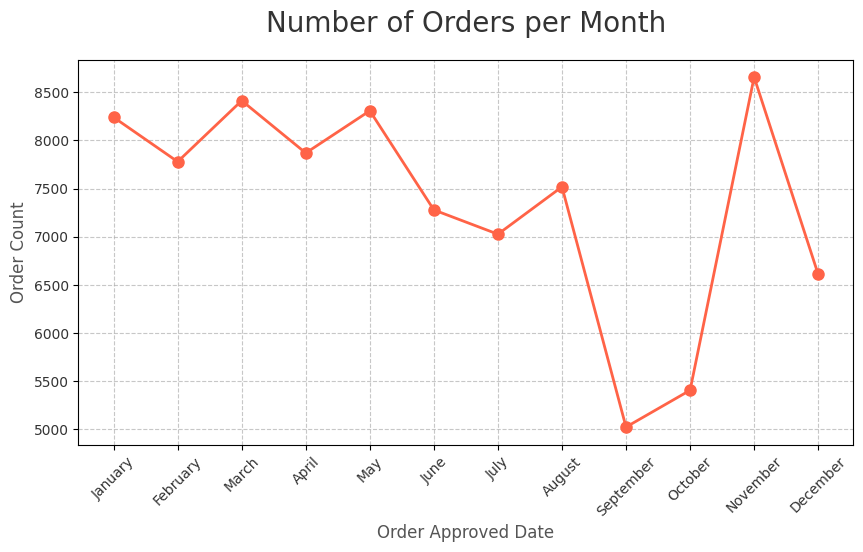

In [98]:
plt.figure(figsize=(10, 5))

# Mengubah warna garis menjadi gradien biru tua dan menambahkan elemen grid
plt.plot(
    monthly_order["order_approved_at"],
    monthly_order["order_count"],
    marker='o',
    markersize=8,  # Menambah ukuran marker untuk lebih menonjolkan titik data
    linewidth=2,
    color="#FF6347"  # Mengubah warna garis menjadi oranye
)

# Menambahkan judul dan mengatur jarak dengan sumbu X menggunakan 'pad'
plt.title("Number of Orders per Month", loc="center", fontsize=20, color="#333333", pad=20)  # Menambah jarak dengan pad
plt.xlabel("Order Approved Date", fontsize=12, color="#555555")
plt.ylabel("Order Count", fontsize=12, color="#555555")

# Menambahkan grid untuk tampilan yang lebih rapi
plt.grid(True, linestyle='--', alpha=0.7)

# Mengatur tampilan sumbu X dan Y agar lebih jelas
plt.xticks(fontsize=10, rotation=45, color="#333333")
plt.yticks(fontsize=10, color="#333333")

# Menampilkan grafik
plt.show()


Dari grafik yang divisualisasikan, terlihat adanya penurunan yang cukup drastis pada jumlah pesanan di bulan September, diikuti dengan lonjakan signifikan pada bulan November. Hal ini menunjukkan fluktuasi yang cukup tajam dalam pola pesanan selama periode tersebut.

### 2. Produk apa yang memiliki penjualan tertinggi nomor 1 dan terendah nomor 1?

In [99]:
sum_order_df = all_data.groupby("product_category_name_english")["product_id"].count().reset_index()
sum_order_df = sum_order_df.rename(columns={"product_id": "products"})
sum_order_df = sum_order_df.sort_values(by="products", ascending=False)

sum_order_df.head()

,product_category_name_english,products
7,bed_bath_table,13311
43,health_beauty,9749
65,sports_leisure,8736
39,furniture_decor,8558
15,computers_accessories,7926


In [100]:
sum_order_df.sort_values(by="products", ascending=True).head(5)

,product_category_name_english,products
61,security_and_services,2
29,fashion_childrens_clothes,7
11,cds_dvds_musicals,14
52,la_cuisine,15
3,arts_and_craftmanship,24


<ipython-input-101-69f39b18b681>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="products", y="product_category_name_english", data=sum_order_df.head(5), palette=color_palette, ax=ax[0])
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seabor

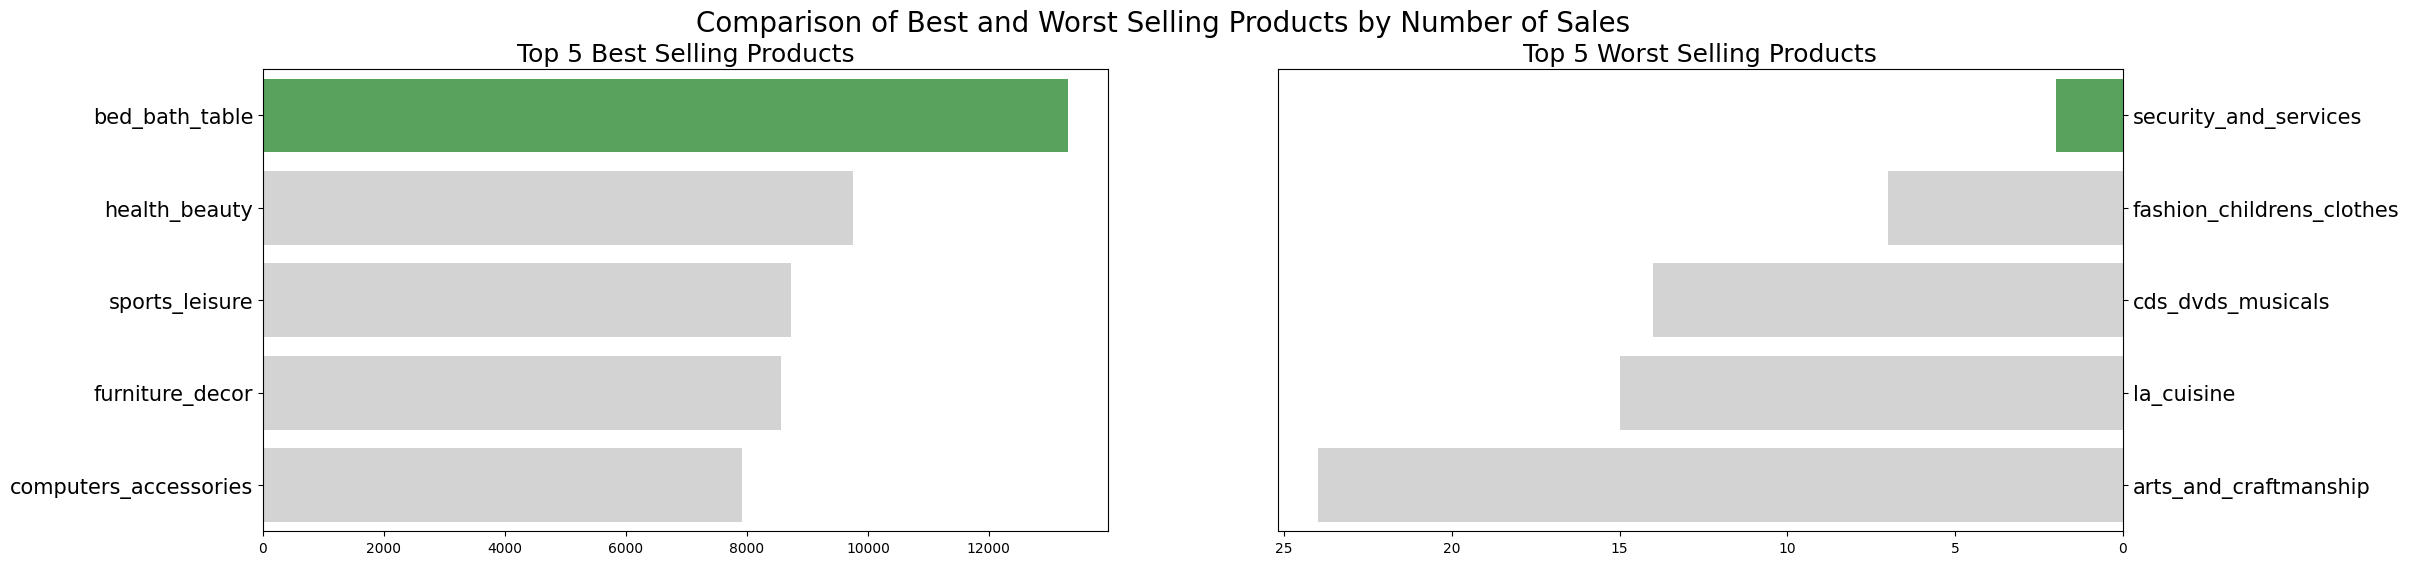

In [101]:
# Membuat subplots untuk menampilkan produk terlaris dan produk terburuk
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

# Menentukan palet warna untuk grafik: hijau untuk produk terlaris pertama, abu-abu untuk lainnya
color_palette = ["#4CAF50"] + ["#D3D3D3"] * 4  # Hijau untuk produk terlaris, abu-abu untuk yang lain

# Membuat grafik batang untuk produk terlaris
sns.barplot(x="products", y="product_category_name_english", data=sum_order_df.head(5), palette=color_palette, ax=ax[0])
ax[0].set_ylabel(None)  # Menghilangkan label sumbu Y
ax[0].set_xlabel(None)  # Menghilangkan label sumbu X
ax[0].set_title("Top 5 Best Selling Products", loc="center", fontsize=18)  # Judul grafik
ax[0].tick_params(axis='y', labelsize=15)  # Menentukan ukuran label pada sumbu Y

# Membuat grafik batang untuk produk terburuk
sns.barplot(x="products", y="product_category_name_english", data=sum_order_df.sort_values(by="products", ascending=True).head(5), palette=color_palette, ax=ax[1])
ax[1].set_ylabel(None)  # Menghilangkan label sumbu Y
ax[1].set_xlabel(None)  # Menghilangkan label sumbu X
ax[1].invert_xaxis()  # Membalikkan sumbu X
ax[1].yaxis.set_label_position("right")  # Mengatur posisi label sumbu Y ke kanan
ax[1].yaxis.tick_right()  # Menampilkan ticks pada sumbu Y di sisi kanan
ax[1].set_title("Top 5 Worst Selling Products", loc="center", fontsize=18)  # Judul grafik
ax[1].tick_params(axis='y', labelsize=15)  # Menentukan ukuran label pada sumbu Y

# Menambahkan judul umum untuk seluruh grafik
plt.suptitle("Comparison of Best and Worst Selling Products by Number of Sales", fontsize=20)
plt.show()  # Menampilkan grafik


Berdasarkan grafik di atas, dapat disimpulkan bahwa kategori produk yang paling banyak diminati oleh pelanggan adalah "bed_bath_table" dengan total penjualan sebanyak 13.311 unit. Sementara itu, kategori produk "security and services" mencatat penjualan terendah, hanya mencapai 2 unit.

### 3. Bagaimana tingkat kepuasan pelanggan pada tahun 2018 berdasarkan data survei dan metrik terkait?


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

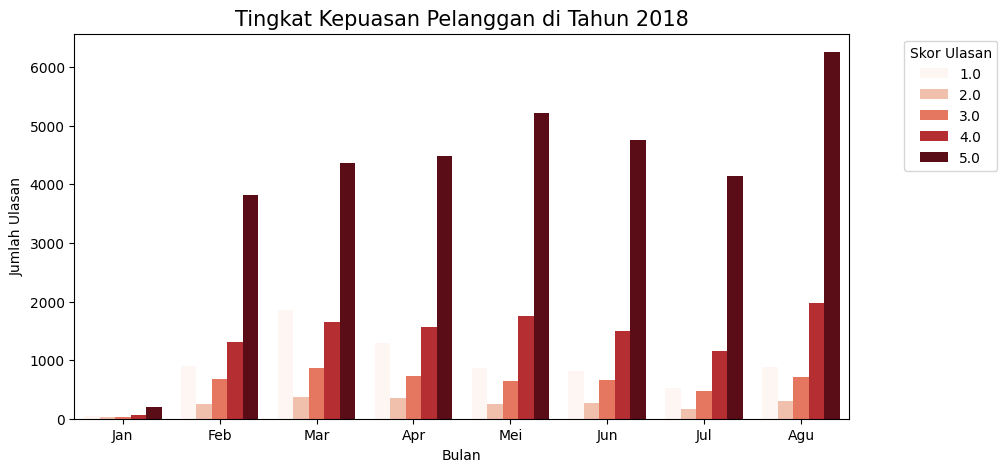

In [102]:
# Konversi kolom 'review_creation_date' ke tipe datetime untuk memastikan format yang benar
all_data['review_creation_date'] = pd.to_datetime(all_data['review_creation_date'])

# Menyaring data untuk mendapatkan ulasan dari 8 bulan terakhir
recent_eight_months_data = all_data[all_data['review_creation_date'] >= all_data['review_creation_date'].max() - pd.DateOffset(months=7)]

# Membuat plot batang untuk menampilkan skor ulasan berdasarkan bulan
plt.figure(figsize=(10, 5))
sns.countplot(x=recent_eight_months_data['review_creation_date'].dt.month,
              hue=recent_eight_months_data['review_score'],
              palette="Reds")  # Menggunakan palet warna merah

plt.title("Tingkat Kepuasan Pelanggan di Tahun 2018", fontsize=15)
plt.xlabel("Bulan")
plt.ylabel("Jumlah Ulasan")
plt.legend(title="Skor Ulasan", loc='upper right', bbox_to_anchor=(1.2, 1))

# Menetapkan label bulan
bulan = ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu']
plt.xticks(range(0, 8), bulan)

# Menampilkan plot
plt.show()


In [103]:
avg_review = recent_eight_months_data['review_score'].mean()
print(f"Average Review Score: **{avg_review:.2f}**")

Average Review Score: **4.05**


Grafik tersebut menunjukkan bahwa pelanggan secara umum merasa sangat puas dengan layanan yang diberikan. Hal ini ditunjukkan oleh dominasi jumlah ulasan dengan rating 5, yang lebih tinggi dibandingkan dengan rating lainnya. Selain itu, rata-rata nilai ulasan yang diberikan pada tahun 2018 tercatat sebesar 4,05, menunjukkan kepuasan yang cukup tinggi di kalangan pelanggan.

## Analisis Lanjutan

### RFM Analysis

In [104]:
import datetime as dt

now = dt.datetime(2018, 10, 17)

all_data['order_purchase_timestamp'] = pd.to_datetime(all_data['order_purchase_timestamp'])

# Group by 'customer_id' and calculate Recency, Frequency, and Monetary
recency = (now - all_data.groupby('customer_id')['order_purchase_timestamp'].max()).dt.days
frequency = all_data.groupby('customer_id')['order_id'].count()
monetary = all_data.groupby('customer_id')['price'].sum()


In [105]:
# RFM DataFrame
rfm = pd.DataFrame({
    'customer_id': recency.index,
    'Recency': recency.values,
    'Frequency': frequency.values,
    'Monetary': monetary.values
})

# Menghitung Persentil
rfm_percentiles = rfm[['Recency', 'Frequency', 'Monetary']].rank(pct=True)

# Segmentasi RFM
rfm['RFM_Score'] = rfm_percentiles['Recency'] * 100 + rfm_percentiles['Frequency'] * 10 + rfm_percentiles['Monetary']
rfm['RFM_Score'] = rfm['RFM_Score'].clip(0, 100)
rfm_segment = pd.cut(rfm['RFM_Score'], bins=[0, 33, 66, 100], labels=['Low', 'Mid', 'High'])
rfm['Segment'] = rfm_segment

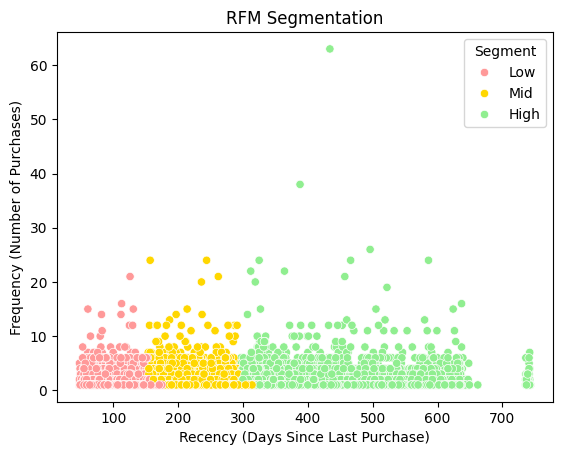

In [106]:
# Visualisasi Segmen RFM
palette = {'Low': '#FF9999', 'Mid': '#FFD700', 'High': '#90EE90'}  # Warna yang lebih harmonis
sns.scatterplot(x='Recency', y='Frequency', hue='Segment', data=rfm, palette=palette)
plt.title('RFM Segmentation')
plt.xlabel('Recency (Days Since Last Purchase)')
plt.ylabel('Frequency (Number of Purchases)')
plt.legend(title='Segment')
plt.show()

Visualisasi ini menunjukkan dua metrik penting dalam analisis perilaku pelanggan:

- Sumbu horizontal (X-axis) menggambarkan Recency, yaitu jumlah hari sejak pembelian terakhir. Nilai yang lebih rendah menunjukkan bahwa pelanggan baru-baru ini melakukan pembelian.

- Sumbu vertikal (Y-axis) menggambarkan Frequency, yaitu total jumlah pembelian. Nilai yang lebih tinggi berarti pelanggan sering bertransaksi.

Dari grafik, terlihat bahwa sebagian besar pelanggan memiliki frequency pembelian rendah (kurang dari 10 pembelian), dan banyak di antara mereka berada di segmen high recency, yang berarti mereka sudah lama tidak bertransaksi. Hal ini menunjukkan potensi untuk meningkatkan keterlibatan dan retensi pelanggan.

### Keterangan Kolom Analisis RFM

- **Recency**: Mengukur waktu terakhir pelanggan melakukan pembelian; nilai kecil berarti pembelian baru-baru ini.
  
- **Frequency**: Menunjukkan seberapa sering pelanggan berbelanja; nilai tinggi menunjukkan frekuensi tinggi dalam pembelian.

- **Monetary**: Total nilai pengeluaran pelanggan; nilai tinggi berarti pelanggan menghabiskan lebih banyak uang.

- **RFM_Score**: Skor kombinasi dari Recency, Frequency, dan Monetary; skor tinggi menunjukkan pelanggan aktif dan berkontribusi signifikan terhadap pendapatan.

- **Segment**:
  - **High**: Pelanggan yang sering berbelanja dan menghabiskan banyak uang.
  - **Mid**: Pelanggan dengan perilaku pembelian yang moderat.
  - **Low**: Pelanggan yang jarang berbelanja dan menghabiskan sedikit.

In [107]:
# Customer dengan pengeluaran terbesar
top_monetary_customers = rfm.sort_values(by='Monetary', ascending=False).head(10)
top_monetary_customers.head()

,customer_id,Recency,Frequency,Monetary,RFM_Score,Segment
8241,1617b1357756262bfa56ab541c47bc16,382,8,13440.00,83.789740,High
83483,de832e8dbb1f588a47013e53feaa67cc,505,15,10856.10,99.839307,High
37205,63b964e79dee32a3587651701a2b8dbf,244,24,9888.00,55.374783,Mid
41462,6f241d5bbb142b6f764387c8c270645a,159,7,9520.14,34.557531,Mid
54750,926b6a6fb8b6081e00b335edaf578d35,546,2,7998.00,100.000000,High


In [108]:
# Customer yang terakhir belanja
recent_customers = rfm.sort_values(by='Recency', ascending=False).head(10)
recent_customers.head()

,customer_id,Recency,Frequency,Monetary,RFM_Score,Segment
44873,7812fcebfc5e8065d31e1bb5f0017dae,743,1,29.99,100.0,High
41630,6f989332712d3222b6571b1cf5b835ce,743,1,36.49,100.0,High
47426,7ec40b22510fdbea1b08921dd39e63d8,743,1,21.90,100.0,High
82721,dc607dc98d6a11d5d04d9f2a70aa6c34,743,1,74.90,100.0,High
42123,70fc57eeae292675927697fe03ad3ff5,743,1,21.50,100.0,High


In [109]:
# Customer dengan pembelian terbanyak
top_frequency_customers = rfm.sort_values(by='Frequency', ascending=False).head(10)
top_frequency_customers.head()

,customer_id,Recency,Frequency,Monetary,RFM_Score,Segment
14657,270c23a11d024a44c896d1894b261a83,434,63,2305.38,91.198487,High
7310,13aa59158da63ba0e93ec6ac2c07aacb,388,38,3039.62,84.627325,High
54898,92cd3ec6e2d643d4ebd0e3d6238f69e2,496,26,1299.74,98.743795,High
78952,d22f25a9fadfb1abbc2e29395b1239f4,157,24,359.76,34.007254,Mid
37205,63b964e79dee32a3587651701a2b8dbf,244,24,9888.00,55.374783,Mid


4. Dimana letak geografis yang memiliki customer terbanyak?

In [110]:
other_state_geolocation = geolocation_df.groupby(['geolocation_zip_code_prefix'])['geolocation_state'].nunique().reset_index(name='count')
other_state_geolocation[other_state_geolocation['count']>= 2].shape
max_state = geolocation_df.groupby(['geolocation_zip_code_prefix','geolocation_state']).size().reset_index(name='count').drop_duplicates(subset = 'geolocation_zip_code_prefix').drop('count',axis=1)


In [111]:
geolocation_silver = geolocation_df.groupby(['geolocation_zip_code_prefix','geolocation_city','geolocation_state'])[['geolocation_lat','geolocation_lng']].median().reset_index()
geolocation_silver = geolocation_silver.merge(max_state,on=['geolocation_zip_code_prefix','geolocation_state'],how='inner')


In [112]:
customers_silver = customers_df.merge(geolocation_silver,left_on='customer_zip_code_prefix',right_on='geolocation_zip_code_prefix',how='inner')


In [113]:
customers_silver.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_city,geolocation_state,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,franca,SP,-20.502307,-47.396740
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,9790,sao bernardo do campo,SP,-23.731211,-46.541206
2,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,9790,são bernardo do campo,SP,-23.727018,-46.543192
3,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1151,sao paulo,SP,-23.531294,-46.657039
4,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1151,são paulo,SP,-23.531294,-46.656866


In [114]:
customers_silver.to_csv("geolocation.csv", index=False)

In [115]:
def plot_brazil_map(data):
    brazil = mpimg.imread(urllib.request.urlopen('https://i.pinimg.com/originals/3a/0c/e1/3a0ce18b3c842748c255bc0aa445ad41.jpg'),'jpg')
    ax = data.plot(kind="scatter", x="geolocation_lng", y="geolocation_lat", figsize=(10,10), alpha=0.3,s=0.3,c='maroon')
    plt.axis('off')
    plt.imshow(brazil, extent=[-73.98283055, -33.8,-33.75116944,5.4])
    plt.show()

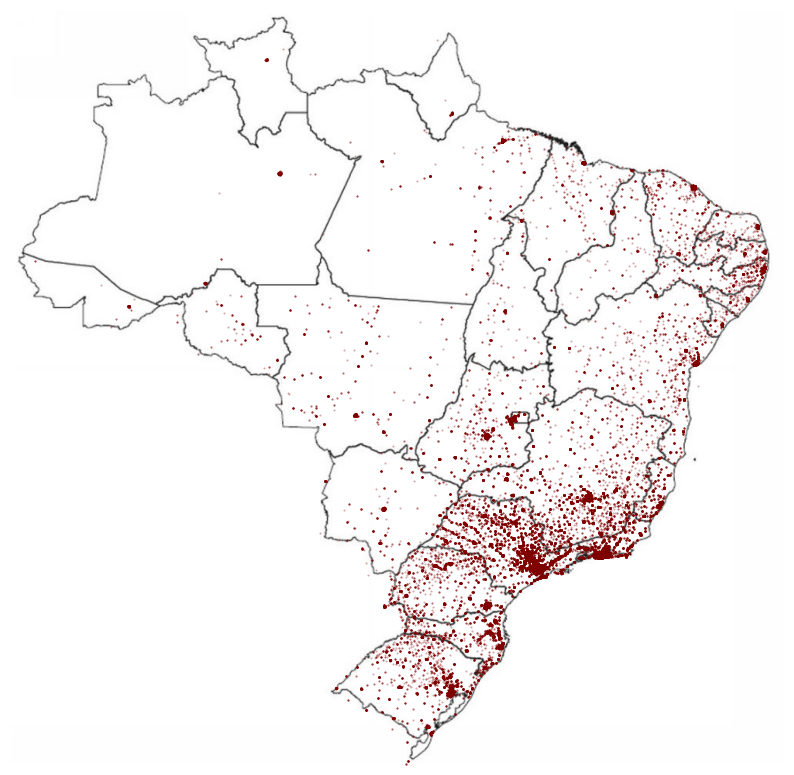

In [116]:
plot_brazil_map(customers_silver.drop_duplicates(subset='customer_unique_id'))


Mayoritas pelanggan terkonsentrasi di wilayah tenggara dan selatan, terutama di kota-kota besar seperti São Paulo, Rio de Janeiro, dan Porto Alegre.

### Analisis Lanjutan profil demografis customer

Berdasarkan customer_state

In [117]:

bystate_df = all_data.groupby(by="customer_state").customer_id.nunique().reset_index()
bystate_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
bystate_df.head()


,customer_state,customer_count
0,AC,80
1,AL,394
2,AM,144
3,AP,66
4,BA,3228


<ipython-input-118-619333e7d20d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='customer_state',
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to 

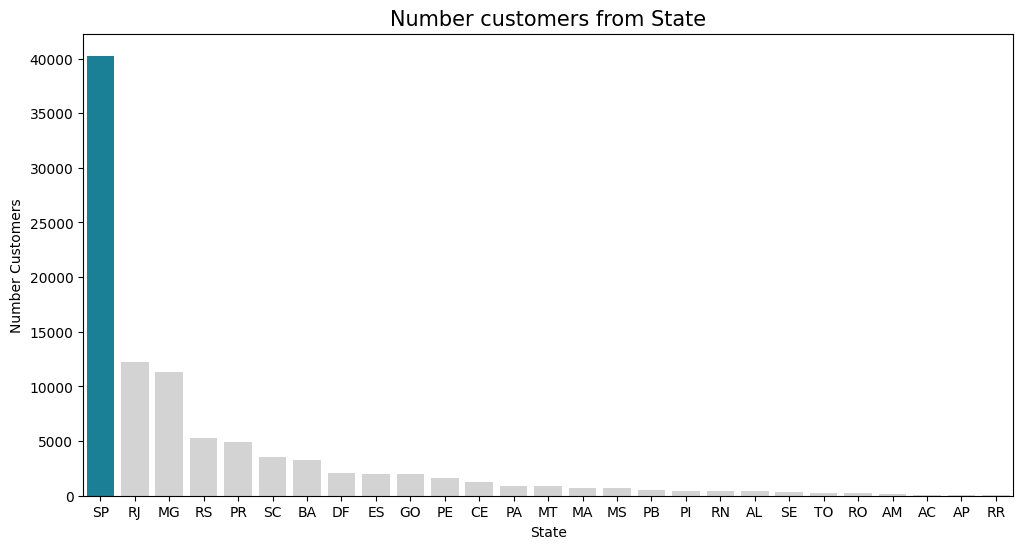

In [118]:
plt.figure(figsize=(12, 6))

most_common_state = bystate_df.loc[bystate_df['customer_count'].idxmax(), 'customer_state']

bystate_df = bystate_df.sort_values(by='customer_count', ascending=False)

sns.barplot(x='customer_state',
            y='customer_count',
            data=bystate_df,
            palette=["#068DA9" if state == most_common_state else "#D3D3D3" for state in bystate_df['customer_state']]
            )

plt.title("Number customers from State", fontsize=15)
plt.xlabel("State")
plt.ylabel("Number Customers")
plt.xticks(fontsize=10)
plt.show()

Pada grafik diatas berdasarkan State, SP memiliki data customer terbanyak.

<ipython-input-119-c70cd70c7306>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bycity_df.index,
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to p

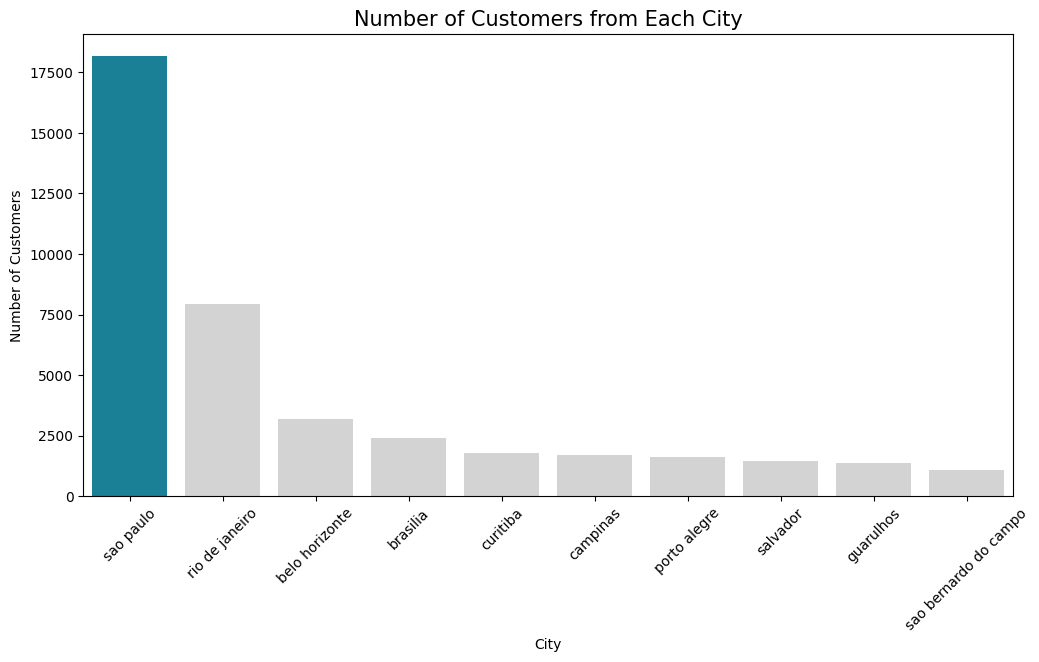

In [119]:
bycity_df = all_data['customer_city'].value_counts().head(10)

plt.figure(figsize=(12, 6))

most_common_city = bycity_df.idxmax()

bycity_df = bycity_df.sort_values(ascending=False)

sns.barplot(x=bycity_df.index,
            y=bycity_df.values,
            palette=["#068DA9" if city == most_common_city else "#D3D3D3" for city in bycity_df.index]
            )

plt.title("Number of Customers from Each City", fontsize=15)
plt.xlabel("City")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45, fontsize=10)
plt.show()

Pada grafik diatas berdasarkan City, sao paulo memiliki data customer terbanyak.

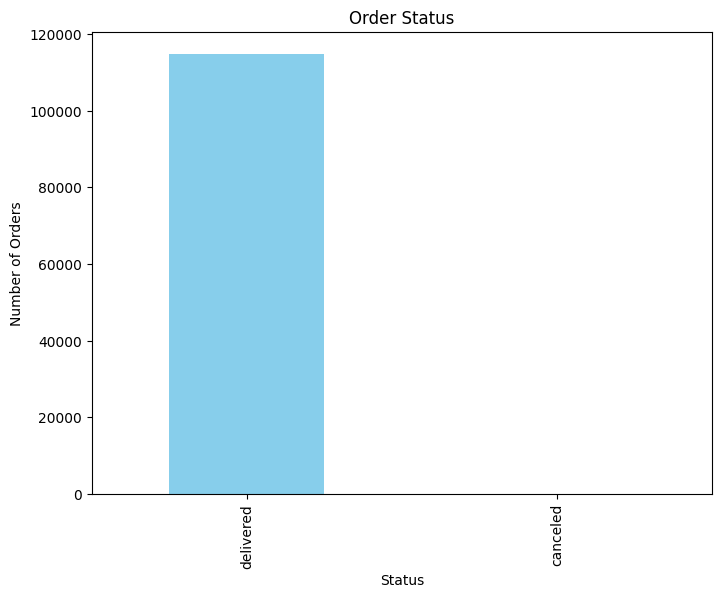

In [120]:
order_status_counts = all_data['order_status'].value_counts()

plt.figure(figsize=(8, 6))
order_status_counts.plot(kind='bar', color='skyblue')
plt.title('Order Status')
plt.xlabel('Status')
plt.ylabel('Number of Orders')
plt.show()

Pada grafik diatas status order paling banyak adalah delivered.

## Conclusion

1. Berapa jumlah pesanan yang disetujui setiap bulan dalam rentang waktu tertentu, dan bagaimana perubahannya dari bulan ke bulan?
2. Produk apa yang memiliki penjualan tertinggi nomor 1 dan terendah nomor 1?
3. Bagaimana tingkat kepuasan pelanggan pada tahun 2018 berdasarkan data survei dan metrik terkait?
4. Dimana letak geografis yang memiliki customer terbanyak?

### Berapa jumlah pesanan yang disetujui setiap bulan dalam rentang waktu tertentu, dan bagaimana perubahannya dari bulan ke bulan?

Pembelian pelanggan menunjukkan variasi yang signifikan, dengan fluktuasi nilai yang mencerminkan kenaikan dan penurunan setiap bulannya. Analisis data mengungkapkan bahwa bulan November mencatat puncak maksimum pembelian, sedangkan bulan September mengalami puncak minimum.

### Produk apa yang memiliki penjualan tertinggi nomor 1 dan terendah nomor 1?

Produk yang paling populer di kalangan pelanggan adalah kategori "bed_bath_table," dengan penjualan mendekati 14.000 unit. Di sisi lain, kategori produk "security and services" mencatatkan penjualan terendah, hanya sebanyak 2 unit.

### Bagaimana tingkat kepuasan pelanggan pada tahun 2018 berdasarkan data survei dan metrik terkait?

Tingkat kepuasan pelanggan terhadap layanan yang diberikan sangat tinggi, seperti yang terlihat dalam visualisasi data. Sebagian besar pelanggan memberikan rating 5, sementara rating 4 menduduki posisi kedua terbanyak. Rata-rata nilai review yang diterima pada tahun 2018 adalah 4,05.

### Dimana letak geografis yang memiliki customer terbanyak?

Berdasarkan grafik yang telah dibuat, mayoritas pelanggan terkonsentrasi di wilayah tenggara dan selatan. Selain itu, terdapat jumlah pelanggan yang lebih tinggi di kota-kota besar yang berperan sebagai ibu kota, seperti São Paulo, Rio de Janeiro, dan Porto Alegre.